<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

## 生成机器学习数据文档

In [1]:
import os
import pandas as pd
import random
import numpy as np

In [2]:
path = '../data'
origin_file = pd.read_excel(os.path.join(path, 'shops_nm.xlsx'), encoding='utf8')
origin_file.head()

,店名,关键词,城市,评分,评价数,人均,地址,营业时间,菜名
0,老北京涮羊肉,火锅,xa,4.4,877.0,45.5,西安市雁塔区朱雀大街250号东方大酒店西门斜对面（子午路站下车向北走60米路西）,11:00-21:00,【羊肉】【豆腐】【麻酱】【精品肥牛】【粉丝】【羔羊肉】【牛肚】【油豆皮】【香菇】【豆皮】【土...
1,鲜上鲜文鱼庄(望庭国际店),火锅,xa,4.6,535.0,56,西安市高新区高新路80号望庭国际一栋楼10106室,11:00-23:00,【菌菇大拼】【麻酱】【菠萝飞饼】【鸳鸯锅】【酸菜鸳鸯锅】【青菜】【毛肚】【文鱼】【菌汤】【鱼...
2,大龙燚火锅(李家村店),火锅,xa,4.6,29.0,大概92左右,西安市碑林区雁塔北路时亿广场南座2楼李家村华润万家外,10:00-22:00,【手撕竹笋】【麻辣排骨】【砣砣牛肉】【菠萝飞饼】【鸭血】【四川金针菇】【麻辣牛肉】【贡菜】【...
3,鲜上鲜文鱼庄(阳阳国际店),火锅,xa,4.6,906.0,56,西安市雁塔区朱雀大街132号阳阳国际广场C座2楼,11:00-22:00,【海带】【鸳鸯锅】【冻豆腐】【荷包豆腐】【生鱼片】【毛肚】【文鱼】【清汤锅】【山珍菌汤锅】【...
4,大龙燚火锅(粉巷店),火锅,xa,4.6,2253.0,人均：100,西安市碑林区粉巷南院门15A南苑中央广场食尚南苑2F,周一至周日 10:00-21:00,【麻辣排骨】【千层毛肚】【鸳鸯锅】【鸭血】【天味香肠】【薄土豆】【功夫黄瓜】【清汤锅】【印度...


In [3]:
shop_names = np.array(list(origin_file['店名'])).reshape((len(origin_file), 1))
features = np.random.binomial(1, 0.5, size=len(shop_names) * 5).reshape((len(shop_names), 5))
shops = np.concatenate((shop_names, features), axis=1)

In [4]:

df = pd.DataFrame(shops, columns=['店名', '主打菜特色', '食材是否新鲜', '调料是否有特色', '价格是否划算', '店内环境'])
df.head()

,店名,主打菜特色,食材是否新鲜,调料是否有特色,价格是否划算,店内环境
0,老北京涮羊肉,0,1,1,1,1
1,鲜上鲜文鱼庄(望庭国际店),0,1,1,0,1
2,大龙燚火锅(李家村店),1,0,1,1,0
3,鲜上鲜文鱼庄(阳阳国际店),0,1,0,1,1
4,大龙燚火锅(粉巷店),0,1,0,1,1


In [5]:

df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)
df['sum'] = df.iloc[:, 1:].sum(axis=1)
df.head()


,店名,主打菜特色,食材是否新鲜,调料是否有特色,价格是否划算,店内环境,sum
0,老北京涮羊肉,0,1,1,1,1,4.0
1,鲜上鲜文鱼庄(望庭国际店),0,1,1,0,1,3.0
2,大龙燚火锅(李家村店),1,0,1,1,0,3.0
3,鲜上鲜文鱼庄(阳阳国际店),0,1,0,1,1,3.0
4,大龙燚火锅(粉巷店),0,1,0,1,1,3.0


In [6]:
def judge(x):
    if x[6] >= 4 and x[2] == 1 and x[5] == 1:
        return 1
    else:
        return 0


In [7]:
df['y'] = df.apply(judge, axis=1)
del df['sum']
df.head()
df.to_excel(os.path.join(path, 'shops_nm_cleaned.xlsx'), encoding='utf8', index=False)


## sklearn使用介绍

In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [9]:
## 第一步：数据准备
data = pd.read_excel(os.path.join(path, 'shops_nm_cleaned.xlsx'), encoding='utf8')
data.head()

,店名,主打菜特色,食材是否新鲜,调料是否有特色,价格是否划算,店内环境,y
0,老北京涮羊肉,0,1,1,1,1,1
1,鲜上鲜文鱼庄(望庭国际店),0,1,1,0,1,0
2,大龙燚火锅(李家村店),1,0,1,1,0,0
3,鲜上鲜文鱼庄(阳阳国际店),0,1,0,1,1,0
4,大龙燚火锅(粉巷店),0,1,0,1,1,0


In [10]:
## 第二步：划分训练集、验证集、测试集
X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, 1:-1], data.iloc[:, -1], test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.3, random_state=0)
print('训练集的自变量维度: {}, 因变量维度: {}\n'.format(X_train.shape, y_train.shape))
print('验证集的自变量维度: {}, 因变量维度: {}\n'.format(X_val.shape, y_val.shape))
print('测试集的自变量维度: {}, 因变量维度: {}\n'.format(X_test.shape, y_test.shape))

训练集的自变量维度: (489, 5), 因变量维度: (489,)

验证集的自变量维度: (147, 5), 因变量维度: (147,)

测试集的自变量维度: (63, 5), 因变量维度: (63,)



In [11]:
## 第三步：训练模型
clf = tree.DecisionTreeClassifier()    #初始化决策树分类器
clf = clf.fit(X_train, y_train)             #训练样本
print(clf.score(X_val, y_val))            #在验证集上计算平均准确率
clf.predict(X_val)                           #预测样本

1.0


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
## 第四步：模型评估
from sklearn.metrics import recall_score, precision_score, accuracy_score 

y_val_predict = clf.predict(X_val)

print(accuracy_score(y_val, y_val_predict))
print(recall_score(y_val, y_val_predict)) 
print(precision_score(y_val, y_val_predict))

1.0
1.0
1.0


In [13]:
## 第五步：模型调参

#5.1样本加权训练
clf = tree.DecisionTreeClassifier(class_weight="balanced")     #初始化决策树分类器
clf = clf.fit(X_train, y_train)        #训练样本
print(clf.score(X_val, y_val))       #在验证集上计算平均准确率 
clf.predict(X_val)                      #预测样本

1.0


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
#5.2调整决策树深度
max_depths = [depth for depth in range(2, 10)] 
accuracy = [ ]
for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(class_weight="balanced", max_depth=max_depth) 
    clf = clf.fit(X_train, y_train)
    acc = clf.score(X_val, y_val)
    accuracy.append([max_depth, acc])

accuracy

[[2, 0.8775510204081632],
 [3, 0.8775510204081632],
 [4, 0.9455782312925171],
 [5, 1.0],
 [6, 1.0],
 [7, 1.0],
 [8, 1.0],
 [9, 1.0]]

In [15]:
#5.3特征重要程度分析
max_depths = [depth for depth in range(2, 10)]
accuracy = []
for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(class_weight="balanced", max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    acc = clf.score(X_val, y_val)
    importance_ = clf.feature_importances_
    accuracy.append([max_depth, acc, importance_])

accuracy

[[2,
  0.8775510204081632,
  array([0.        , 0.53861818, 0.        , 0.        , 0.46138182])],
 [3,
  0.8775510204081632,
  array([0.        , 0.51617872, 0.        , 0.04166117, 0.44216011])],
 [4,
  0.9455782312925171,
  array([0.10033871, 0.46438601, 0.        , 0.03748094, 0.39779433])],
 [5, 1.0, array([0.09035549, 0.41818182, 0.09949523, 0.03375177, 0.3582157 ])],
 [6, 1.0, array([0.09035549, 0.41818182, 0.09949523, 0.03375177, 0.3582157 ])],
 [7, 1.0, array([0.09035549, 0.41818182, 0.09949523, 0.03375177, 0.3582157 ])],
 [8, 1.0, array([0.09035549, 0.41818182, 0.09949523, 0.03375177, 0.3582157 ])],
 [9, 1.0, array([0.09035549, 0.41818182, 0.09949523, 0.03375177, 0.3582157 ])]]

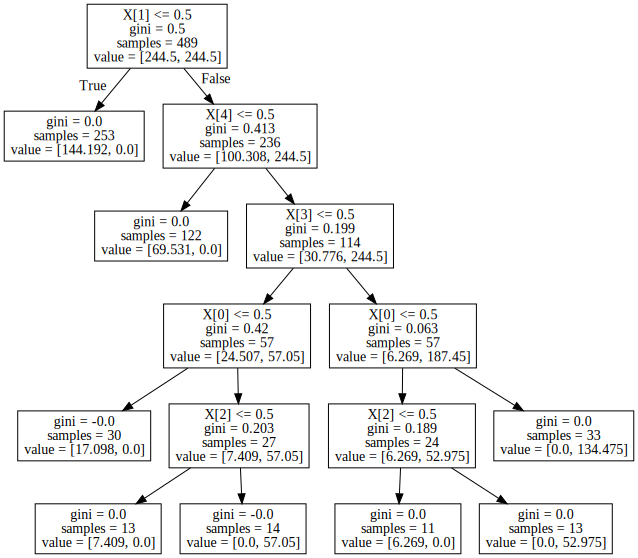

In [16]:
# 第六步：决策过程可视化
model_path = '../model'

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render(os.path.join(model_path, 'decision'))
graph  

In [17]:
# 第七步：模型导出
from sklearn.externals import joblib

files = os.listdir(model_path)
if 'clf.pkl' not in files:
    f = open(os.path.join(model_path, 'clf.pkl'), 'wb+')
    f.close()

joblib.dump(clf, os.path.join(model_path, 'clf.pkl'))

['/Users/lichunyan/Downloads/clf.pkl']

In [18]:
# 模型加载
load_clf = joblib.load(os.path.join(model_path, 'clf.pkl'))
load_clf.score(X_test, y_test)

1.0